In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.2'

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [6]:
address='/content/clothing-dataset-small/train/outwear/01e42413-5514-46d0-8e44-8060d5410dee.jpg'

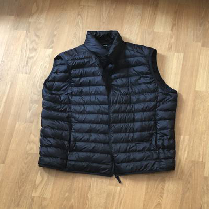

In [7]:
load_img(address,target_size=(209,209))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_get=ImageDataGenerator()
train_ds=train_get.flow_from_directory(
    
    '/content/clothing-dataset-small/train',seed=1,
    target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [10]:
X,y=next(train_ds)

In [11]:
X

array([[[[140., 137., 120.],
         [145., 142., 125.],
         [146., 143., 126.],
         ...,
         [189., 190., 176.],
         [188., 189., 175.],
         [187., 188., 174.]],

        [[142., 139., 122.],
         [147., 144., 127.],
         [148., 145., 128.],
         ...,
         [193., 194., 180.],
         [191., 192., 178.],
         [191., 192., 178.]],

        [[141., 138., 121.],
         [145., 142., 125.],
         [148., 145., 128.],
         ...,
         [193., 194., 180.],
         [191., 192., 178.],
         [191., 192., 178.]],

        ...,

        [[ 62.,  63.,  47.],
         [ 70.,  71.,  55.],
         [ 77.,  78.,  62.],
         ...,
         [180., 176., 164.],
         [183., 179., 167.],
         [191., 187., 175.]],

        [[ 72.,  70.,  49.],
         [ 70.,  67.,  52.],
         [ 78.,  74.,  62.],
         ...,
         [178., 174., 163.],
         [185., 181., 170.],
         [192., 188., 177.]],

        [[ 77.,  75.,  54.],
       

In [12]:
X.shape

(32, 150, 150, 3)

In [13]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 

In [14]:
y.shape

(32, 10)

In [15]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

convert input to range -1 to 1

In [16]:
preprocess_input(X[0])

array([[[ 0.09803927,  0.07450986, -0.05882353],
        [ 0.13725495,  0.11372554, -0.01960784],
        [ 0.14509809,  0.12156868, -0.01176471],
        ...,
        [ 0.48235297,  0.4901961 ,  0.3803922 ],
        [ 0.47450984,  0.48235297,  0.37254906],
        [ 0.4666667 ,  0.47450984,  0.36470592]],

       [[ 0.11372554,  0.09019613, -0.04313725],
        [ 0.15294123,  0.12941182, -0.00392157],
        [ 0.16078436,  0.13725495,  0.00392163],
        ...,
        [ 0.5137255 ,  0.52156866,  0.41176474],
        [ 0.49803925,  0.5058824 ,  0.39607847],
        [ 0.49803925,  0.5058824 ,  0.39607847]],

       [[ 0.10588241,  0.082353  , -0.05098039],
        [ 0.13725495,  0.11372554, -0.01960784],
        [ 0.16078436,  0.13725495,  0.00392163],
        ...,
        [ 0.5137255 ,  0.52156866,  0.41176474],
        [ 0.49803925,  0.5058824 ,  0.39607847],
        [ 0.49803925,  0.5058824 ,  0.39607847]],

       ...,

       [[-0.5137255 , -0.5058824 , -0.6313726 ],
        [-0

In [17]:
train_get=ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds=train_get.flow_from_directory(
    
    '/content/clothing-dataset-small/train',seed=1,
    target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
X,y=next(train_ds)

In [19]:
X

array([[[[ 0.09803927,  0.07450986, -0.05882353],
         [ 0.13725495,  0.11372554, -0.01960784],
         [ 0.14509809,  0.12156868, -0.01176471],
         ...,
         [ 0.48235297,  0.4901961 ,  0.3803922 ],
         [ 0.47450984,  0.48235297,  0.37254906],
         [ 0.4666667 ,  0.47450984,  0.36470592]],

        [[ 0.11372554,  0.09019613, -0.04313725],
         [ 0.15294123,  0.12941182, -0.00392157],
         [ 0.16078436,  0.13725495,  0.00392163],
         ...,
         [ 0.5137255 ,  0.52156866,  0.41176474],
         [ 0.49803925,  0.5058824 ,  0.39607847],
         [ 0.49803925,  0.5058824 ,  0.39607847]],

        [[ 0.10588241,  0.082353  , -0.05098039],
         [ 0.13725495,  0.11372554, -0.01960784],
         [ 0.16078436,  0.13725495,  0.00392163],
         ...,
         [ 0.5137255 ,  0.52156866,  0.41176474],
         [ 0.49803925,  0.5058824 ,  0.39607847],
         [ 0.49803925,  0.5058824 ,  0.39607847]],

        ...,

        [[-0.5137255 , -0.5058824 , -0

In [20]:
valid_get=ImageDataGenerator(preprocessing_function=preprocess_input)
valid_ds=valid_get.flow_from_directory(
    
    '/content/clothing-dataset-small/validation',seed=1,
    target_size=(150,150),
    batch_size=32
)

Found 341 images belonging to 10 classes.


TRANSFER LEARNING

In [21]:
base_model=Xception(
    weights="imagenet",
    input_shape=(150,150,3),
    include_top=False
   
)

83697664/83683744 [==============================] - 4s 0us/step


In [22]:
base_model.trainable=False

In [23]:
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs,training=False)
vector=keras.layers.GlobalAveragePooling2D()(base)
outputs=keras.layers.Dense(10)(vector)


In [24]:
model=keras.Model(inputs,outputs)

In [25]:
learn_rate=0.01
model.compile(
    optimizer=keras.optimizers.Adam(learn_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [26]:
history=model.fit(train_ds,epochs=5,validation_data=valid_ds)


Epoch 1/5
96/96 [==============================] - 29s 163ms/step - loss: 1.2838 - accuracy: 0.6705 - val_loss: 0.7737 - val_accuracy: 0.7771
Epoch 2/5
96/96 [==============================] - 14s 141ms/step - loss: 0.5663 - accuracy: 0.8240 - val_loss: 0.8946 - val_accuracy: 0.7859
Epoch 3/5
96/96 [==============================] - 13s 140ms/step - loss: 0.4595 - accuracy: 0.8517 - val_loss: 0.8362 - val_accuracy: 0.7947
Epoch 4/5
96/96 [==============================] - 14s 147ms/step - loss: 0.2541 - accuracy: 0.9091 - val_loss: 0.8321 - val_accuracy: 0.8240
Epoch 5/5
96/96 [==============================] - 14s 142ms/step - loss: 0.1588 - accuracy: 0.9420 - val_loss: 0.8553 - val_accuracy: 0.8123


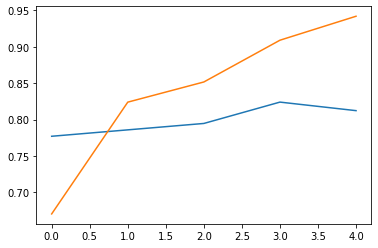

In [27]:
plt.figure(figsize=(6,4))
plt.plot(history.epoch,history.history['val_accuracy'])

plt.plot(history.epoch,history.history['accuracy'])

TRY FOR DIFFERENT PARAMETERS

In [28]:
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs,training=False)
vector=keras.layers.GlobalAveragePooling2D()(base)
outputs=keras.layers.Dense(10)(vector)
model2=keras.Model(inputs,outputs)

In [29]:
learn_rate=0.001
model2.compile(
    optimizer=keras.optimizers.Adam(learn_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [30]:
history=model2.fit(train_ds,epochs=5,validation_data=valid_ds)

Epoch 1/5
96/96 [==============================] - 17s 152ms/step - loss: 1.1003 - accuracy: 0.6369 - val_loss: 0.7064 - val_accuracy: 0.7918
Epoch 2/5
96/96 [==============================] - 14s 142ms/step - loss: 0.6306 - accuracy: 0.7901 - val_loss: 0.6184 - val_accuracy: 0.8094
Epoch 3/5
96/96 [==============================] - 14s 143ms/step - loss: 0.5096 - accuracy: 0.8318 - val_loss: 0.5798 - val_accuracy: 0.8123
Epoch 4/5
96/96 [==============================] - 14s 142ms/step - loss: 0.4297 - accuracy: 0.8605 - val_loss: 0.5445 - val_accuracy: 0.8328
Epoch 5/5
96/96 [==============================] - 14s 150ms/step - loss: 0.3720 - accuracy: 0.8862 - val_loss: 0.5330 - val_accuracy: 0.8211


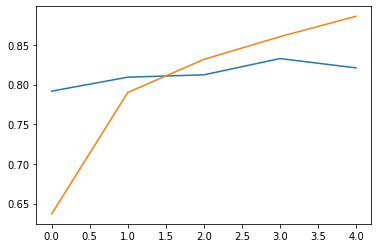

In [31]:
plt.figure(figsize=(6,4))
plt.plot(history.epoch,history.history['val_accuracy'])

plt.plot(history.epoch,history.history['accuracy'])

In [32]:
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs,training=False)
vector=keras.layers.GlobalAveragePooling2D()(base)
outputs=keras.layers.Dense(10)(vector)
model3=keras.Model(inputs,outputs)

learn_rate=0.01
model3.compile(
    optimizer=keras.optimizers.SGD(learn_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history=model3.fit(train_ds,epochs=5,validation_data=valid_ds)

Epoch 1/5
96/96 [==============================] - 17s 150ms/step - loss: 1.4510 - accuracy: 0.5306 - val_loss: 1.0616 - val_accuracy: 0.6540
Epoch 2/5
96/96 [==============================] - 14s 141ms/step - loss: 0.9537 - accuracy: 0.6969 - val_loss: 0.8670 - val_accuracy: 0.7419
Epoch 3/5
96/96 [==============================] - 15s 155ms/step - loss: 0.8064 - accuracy: 0.7402 - val_loss: 0.7762 - val_accuracy: 0.7771
Epoch 4/5
96/96 [==============================] - 13s 140ms/step - loss: 0.7257 - accuracy: 0.7702 - val_loss: 0.7132 - val_accuracy: 0.7801
Epoch 5/5
96/96 [==============================] - 14s 141ms/step - loss: 0.6685 - accuracy: 0.7849 - val_loss: 0.6978 - val_accuracy: 0.7830


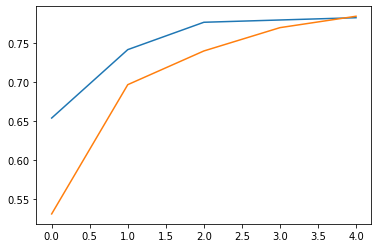

In [33]:
plt.figure(figsize=(6,4))
plt.plot(history.epoch,history.history['val_accuracy'])

plt.plot(history.epoch,history.history['accuracy'])

LETS MAKE IT MORE COMPLEX

In [34]:
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs,training=False)
vector=keras.layers.GlobalAveragePooling2D()(base)

inner=keras.layers.Dense(100,activation='relu')(vector)

dropout=keras.layers.Dropout(0.5)(inner)

outputs=keras.layers.Dense(10)(dropout)

model4=keras.Model(inputs,outputs)

learn_rate=0.001
model4.compile(
    optimizer=keras.optimizers.SGD(learn_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [35]:
history=model4.fit(train_ds,epochs=5,validation_data=valid_ds)

Epoch 1/5
96/96 [==============================] - 17s 153ms/step - loss: 2.3777 - accuracy: 0.1747 - val_loss: 2.0140 - val_accuracy: 0.3343
Epoch 2/5
96/96 [==============================] - 14s 141ms/step - loss: 2.0146 - accuracy: 0.3256 - val_loss: 1.8255 - val_accuracy: 0.4018
Epoch 3/5
96/96 [==============================] - 14s 144ms/step - loss: 1.8594 - accuracy: 0.3892 - val_loss: 1.6938 - val_accuracy: 0.4545
Epoch 4/5
96/96 [==============================] - 14s 142ms/step - loss: 1.7362 - accuracy: 0.4332 - val_loss: 1.5918 - val_accuracy: 0.4809
Epoch 5/5
96/96 [==============================] - 14s 143ms/step - loss: 1.6327 - accuracy: 0.4772 - val_loss: 1.5079 - val_accuracy: 0.5220


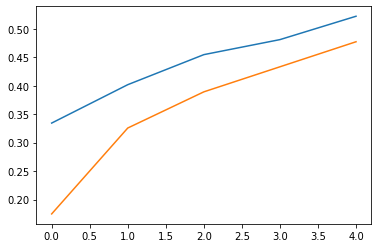

In [36]:
plt.figure(figsize=(6,4))
plt.plot(history.epoch,history.history['val_accuracy'])

plt.plot(history.epoch,history.history['accuracy'])

for setting up check points for weights when performs betters

In [37]:
callbacks=[
           keras.callbacks.ModelCheckpoint(
               'xceptiion_{epoch:02d}_{val_accuracy:.3f}.h5',
               monitor='val_accuracy',
               save_best_only=True,
               mode='max'
           )
]

In [38]:
inputs=keras.Input(shape=(150,150,3))
base=base_model(inputs,training=False)
vector=keras.layers.GlobalAveragePooling2D()(base)

inner=keras.layers.Dense(100,activation='relu')(vector)

dropout=keras.layers.Dropout(0.5)(inner)

outputs=keras.layers.Dense(10)(dropout)

model5=keras.Model(inputs,outputs)

learn_rate=0.001
model5.compile(
    optimizer=keras.optimizers.Adam(learn_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
history=model5.fit(train_ds,epochs=5,validation_data=valid_ds,callbacks=callbacks)

Epoch 1/5
96/96 [==============================] - 17s 157ms/step - loss: 1.2865 - accuracy: 0.5616 - val_loss: 0.7491 - val_accuracy: 0.7595
Epoch 2/5
96/96 [==============================] - 14s 147ms/step - loss: 0.8162 - accuracy: 0.7226 - val_loss: 0.6247 - val_accuracy: 0.8035
Epoch 3/5
96/96 [==============================] - 14s 141ms/step - loss: 0.6978 - accuracy: 0.7601 - val_loss: 0.5961 - val_accuracy: 0.7859
Epoch 4/5
96/96 [==============================] - 14s 146ms/step - loss: 0.5702 - accuracy: 0.7940 - val_loss: 0.5581 - val_accuracy: 0.8065
Epoch 5/5
96/96 [==============================] - 14s 144ms/step - loss: 0.5180 - accuracy: 0.8227 - val_loss: 0.5566 - val_accuracy: 0.8182


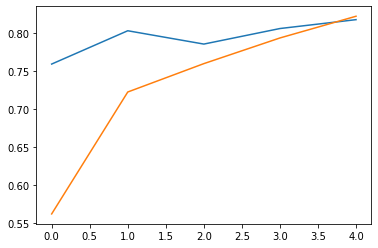

In [40]:
plt.figure(figsize=(6,4))
plt.plot(history.epoch,history.history['val_accuracy'])

plt.plot(history.epoch,history.history['accuracy'])

DATA AUGMENTATION WITH KERAS

In [57]:
vis_gen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

In [58]:
m=load_img(address,target_size=(150,150))
x=np.array(m)

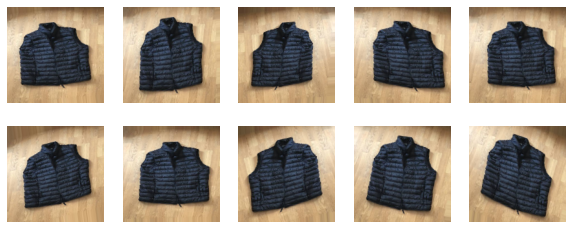

In [59]:
plt.figure(figsize=(10,4))
for i in range(10):
  t=vis_gen.get_random_transform((150,150))
  xaug=vis_gen.apply_transform(x,t)
  plt.subplot(2,5,i+1) 
  plt.imshow(xaug.astype('uint8'))
  plt.axis("off")



we get 10 image from 1 image

IMPLEMENTING TO MODEL

In [61]:
train_get=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=5.0,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
train_ds=train_get.flow_from_directory(
    
    '/content/clothing-dataset-small/train',seed=1,
    target_size=(299,299),
    batch_size=32
)

valid_get=ImageDataGenerator(preprocessing_function=preprocess_input)
valid_ds=valid_get.flow_from_directory(
    
    '/content/clothing-dataset-small/validation',seed=1,
    target_size=(299,299),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [62]:
base_model=Xception(
    weights="imagenet",
    input_shape=(299,299,3),
    include_top=False
   
)

In [63]:
base_model.trainable=False

In [64]:
inputs=keras.Input(shape=(299,299,3))
base=base_model(inputs,training=False)
vector=keras.layers.GlobalAveragePooling2D()(base)

inner=keras.layers.Dense(100,activation='relu')(vector)

dropout=keras.layers.Dropout(0.5)(inner)

outputs=keras.layers.Dense(10)(dropout)

model5=keras.Model(inputs,outputs)

learn_rate=0.001
model5.compile(
    optimizer=keras.optimizers.Adam(learn_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [65]:
callbacks=[
           keras.callbacks.ModelCheckpoint(
               'xceptiion_{epoch:02d}_{val_accuracy:.3f}.h5',
               monitor='val_accuracy',
               save_best_only=True,
               mode='max'
           )
]

In [66]:
history=model5.fit(train_ds,epochs=5,validation_data=valid_ds,callbacks=callbacks)

Epoch 1/5
96/96 [==============================] - 81s 799ms/step - loss: 1.0077 - accuracy: 0.6757 - val_loss: 0.5312 - val_accuracy: 0.8328
Epoch 2/5
96/96 [==============================] - 74s 767ms/step - loss: 0.6002 - accuracy: 0.7992 - val_loss: 0.4603 - val_accuracy: 0.8534
Epoch 3/5
96/96 [==============================] - 73s 758ms/step - loss: 0.5272 - accuracy: 0.8168 - val_loss: 0.4508 - val_accuracy: 0.8416
Epoch 4/5
96/96 [==============================] - 72s 750ms/step - loss: 0.4561 - accuracy: 0.8523 - val_loss: 0.3932 - val_accuracy: 0.8710
Epoch 5/5
96/96 [==============================] - 73s 754ms/step - loss: 0.4230 - accuracy: 0.8576 - val_loss: 0.3701 - val_accuracy: 0.8739


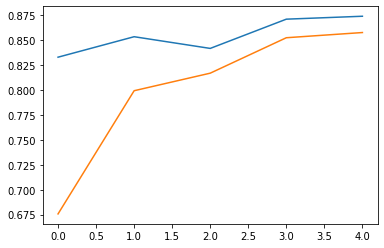

In [67]:
plt.figure(figsize=(6,4))
plt.plot(history.epoch,history.history['val_accuracy'])

plt.plot(history.epoch,history.history['accuracy'])

OUTPUT

In [71]:
model=keras.models.load_model('/content/xceptiion_05_0.874.h5')

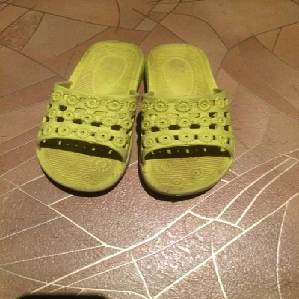

In [87]:
test_img='/content/clothing-dataset-small/test/shoes/0dd87e47-ca85-4d5c-9fd1-59f5a01eb656.jpg'
img=load_img(test_img,target_size=(299,299))
img

In [88]:
x=np.array(img)
x=np.array([x])
X=preprocess_input(x)

In [89]:
pred=model.predict(X)
pred[0]

array([-2.2111325, -2.2897441, -1.9017555, -3.188766 , -3.6467063,
       -4.7784476, 12.395587 , -5.9287176, -5.1632805, -3.5219014],
      dtype=float32)

In [90]:
pred[0].argmax()

6

In [91]:
import os
data_dir='/content/clothing-dataset-small/train'


In [92]:
from torchvision.datasets import ImageFolder
dataset=ImageFolder(data_dir)
dataset.classes

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [93]:
print("prediction=",dataset.classes[pred[0].argmax()])

prediction= shoes
